## Counting and enumerating analogs from routes returned from ASKCOS

### 1. Counting

This Notebook will walk through how to count the estimated number of analogs enabled by synthetic routes returned from ASKCOS for the target molecule [Valsartan](https://pubchem.ncbi.nlm.nih.gov/compound/60846)

For this workflow, it is assumed that a set of routes was already produced using ASKCOS, provided with this tutorial at `data/valsartan_routes.json`

This file contains 10 routes that were returned by ASKCOS.

We will start with the estimation of acccessible analogs.

To do this, run the command: 
`python count_analogs_askcos_route.py --askcos-output data/valsartan_routes.json --building-blocks easie/building_blocks/buyables.json.gz --out outputs/test_askcos --brenk-filters --sim-thresh 0.6 --mw-cutoff 600`

This will count the number of analogs that are accessible for the valsartan routes with a Tanimoto similarity threshold on the building blocks of 0.6, and a molecular weight cutoff on the products of 600g/mol. Brenk filters are applied to remove building blocks that would lead to moieties in the products that are not typically found in pharmaceuticals.

The number of estimated analogs for each route along with additional information about the routes will be output to `outputs/test_askcos_CCCCC(=O)N(CC1=CC=C(C=C1)C2=CC=CC=C2C3=NNN=N3)[C@@H](C(C)C)C(=O)O_pathways_summaries.csv`
Additionally, information about the building block analog matches will be written to `outputs/test_askcos_CCCCC\(\=O\)N\(CC1\=CC\=C\(C\=C1\)C2\=CC\=CC\=C2C3\=NNN\=N3\)\[C@@H\]\(C\(C\)C\)C\(\=O\)O_leaves_summaries.json`

File read as correct json
~~~Route number:0~~~


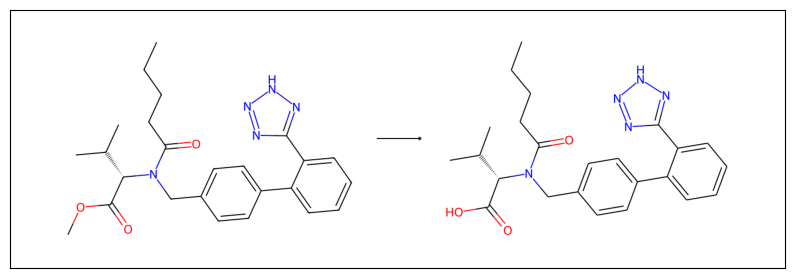

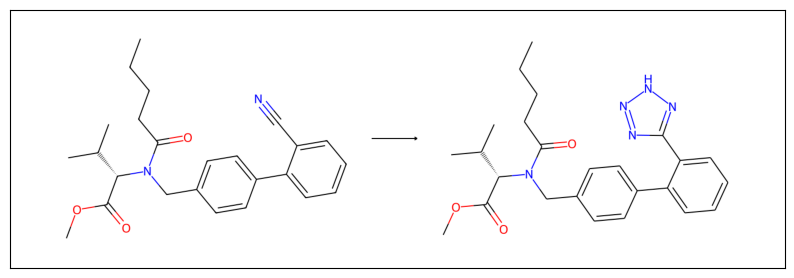

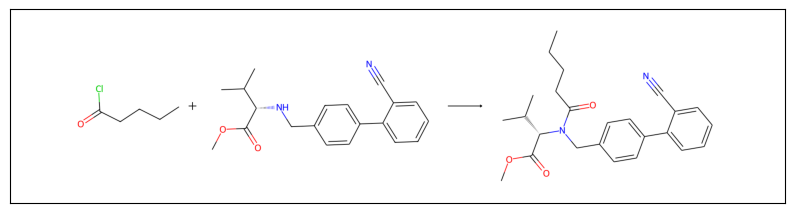

~~~Route number:1~~~


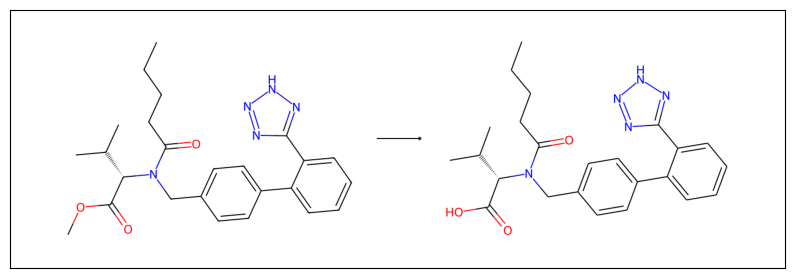

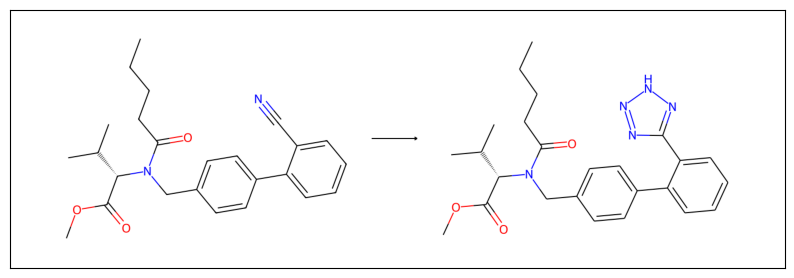

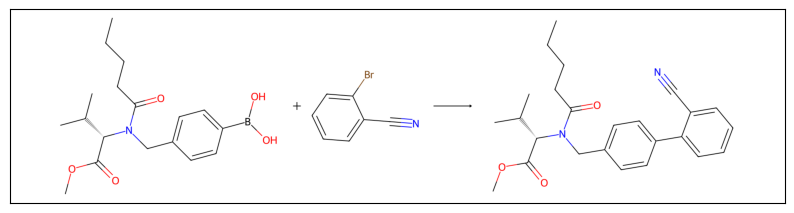

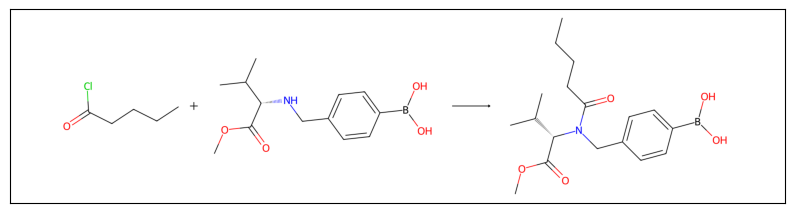

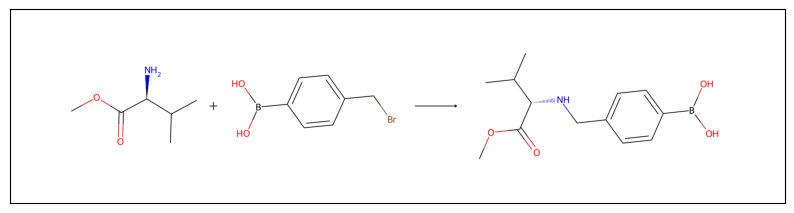

~~~Route number:2~~~


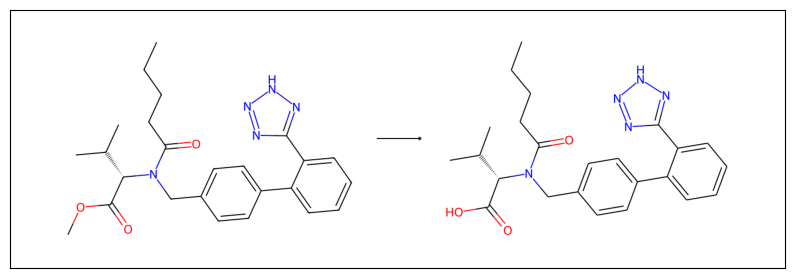

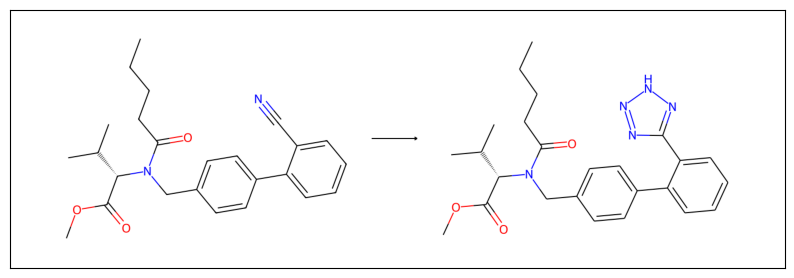

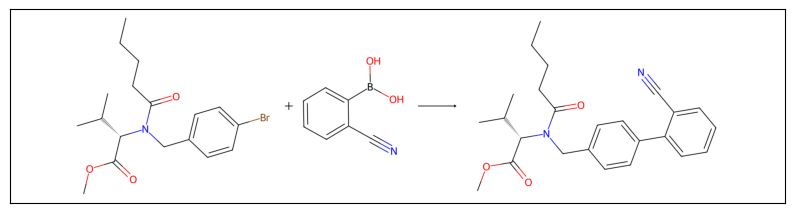

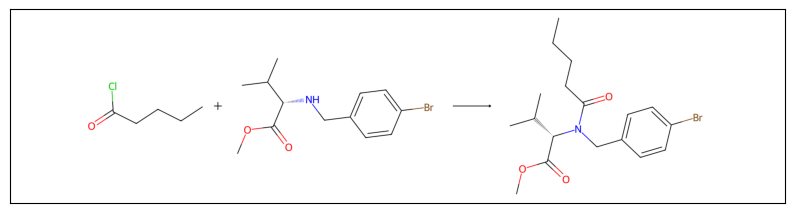

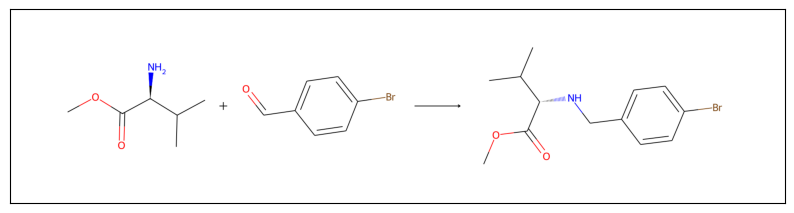

~~~Route number:3~~~


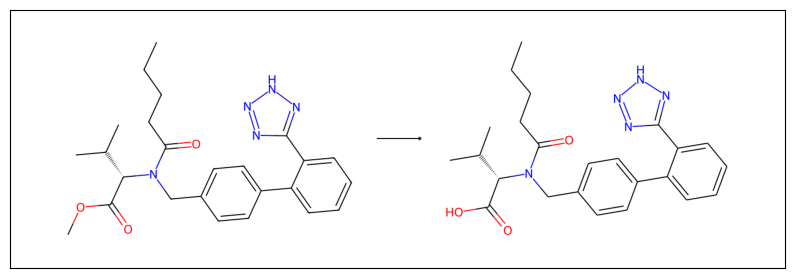

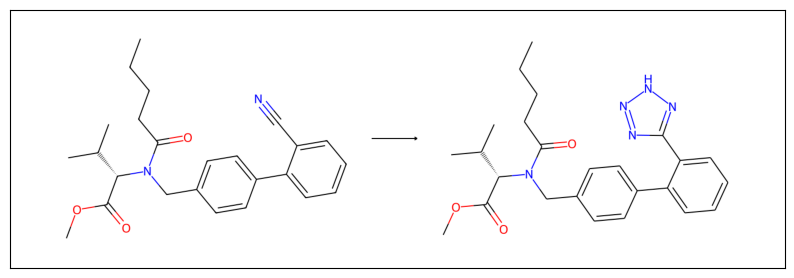

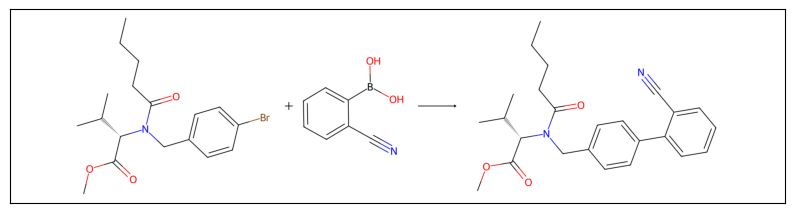

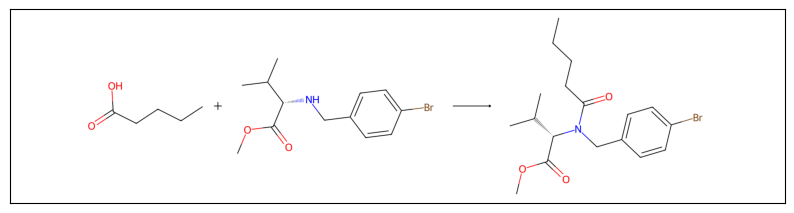

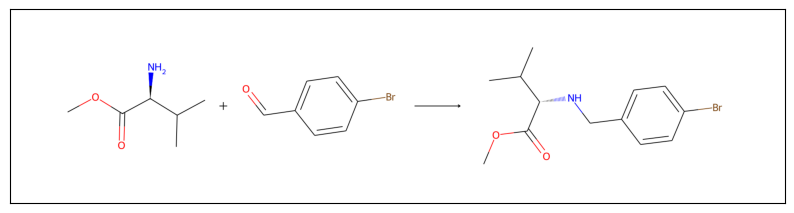

~~~Route number:4~~~


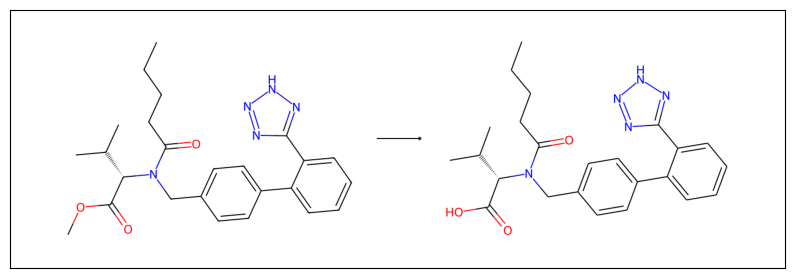

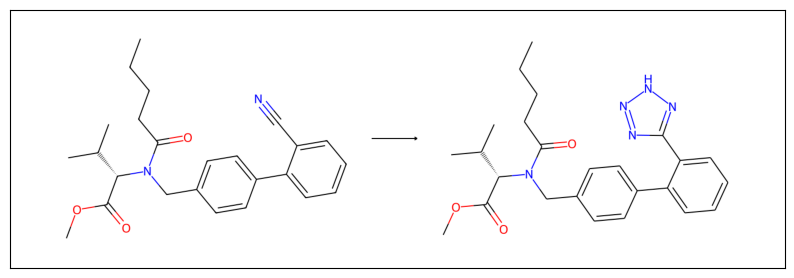

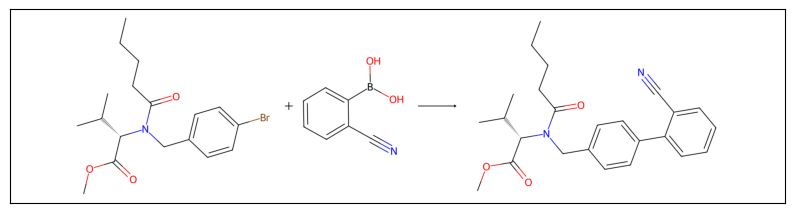

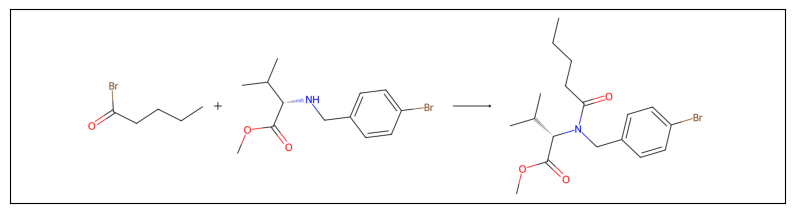

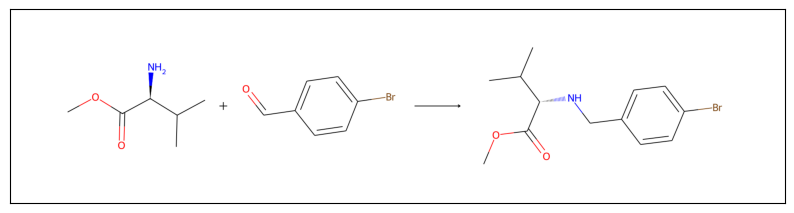

~~~Route number:5~~~


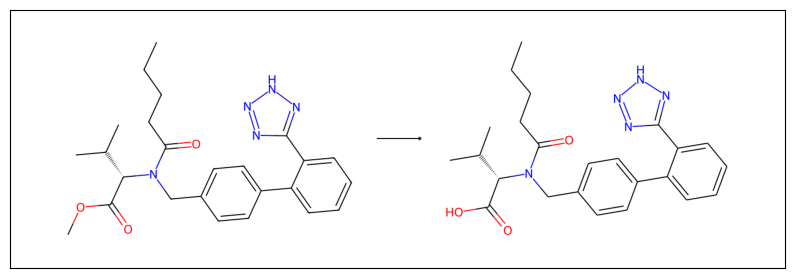

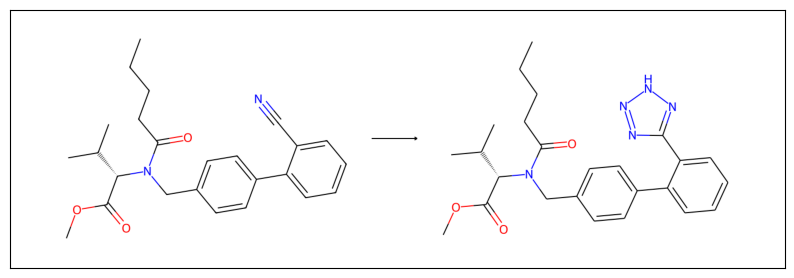

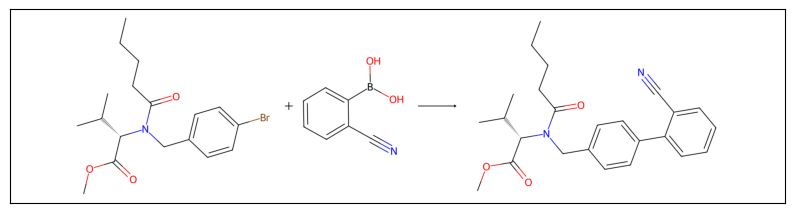

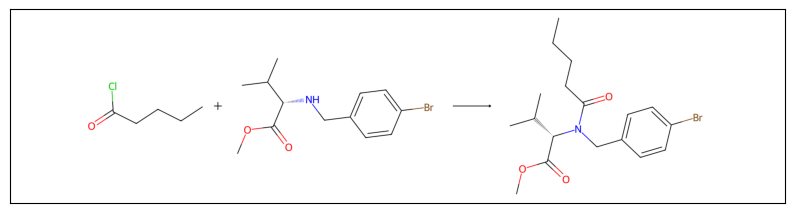

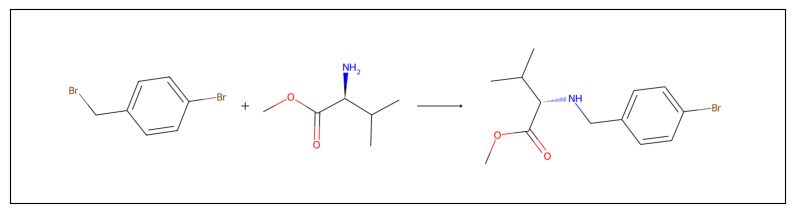

~~~Route number:6~~~


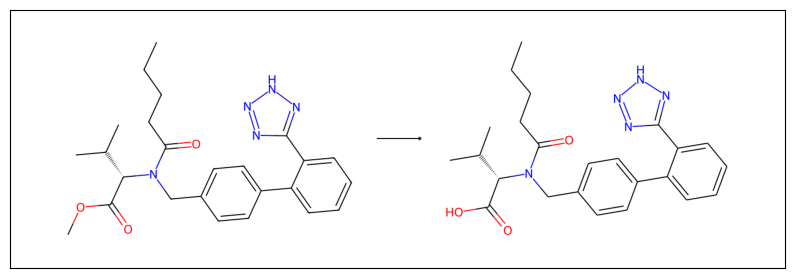

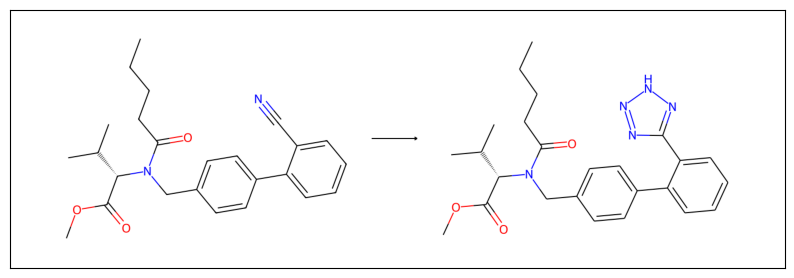

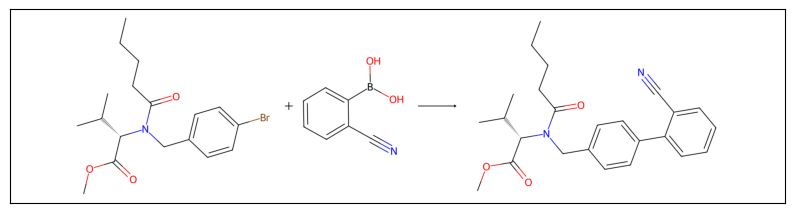

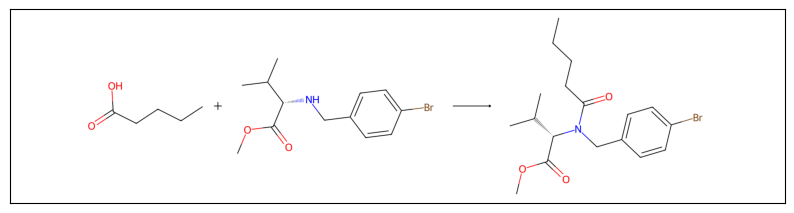

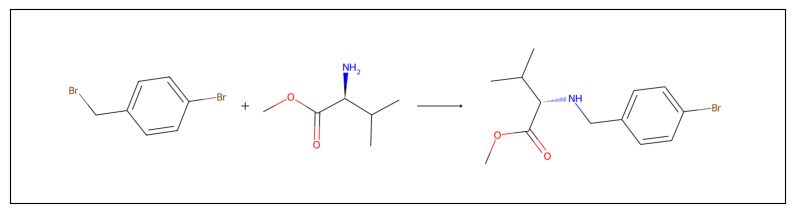

~~~Route number:7~~~


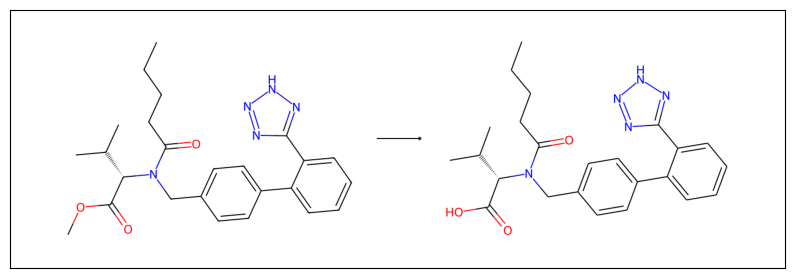

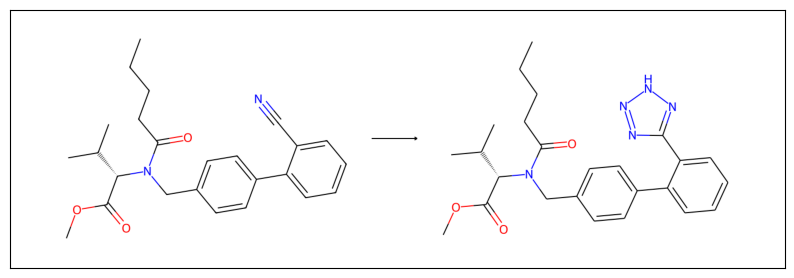

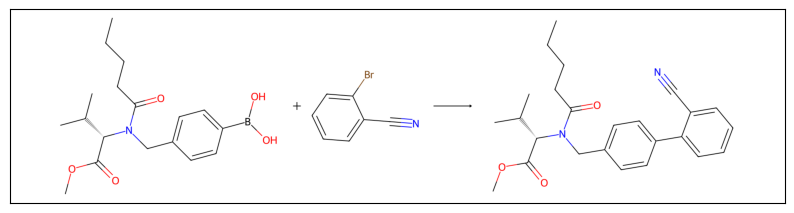

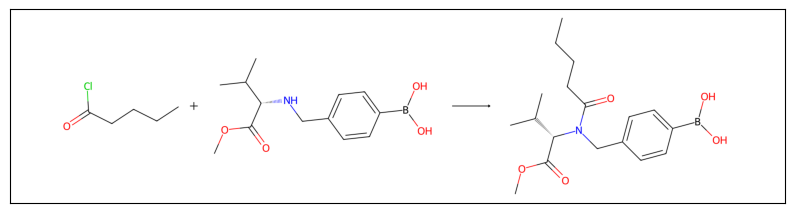

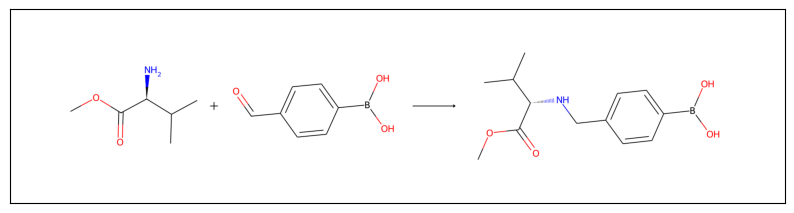

~~~Route number:8~~~


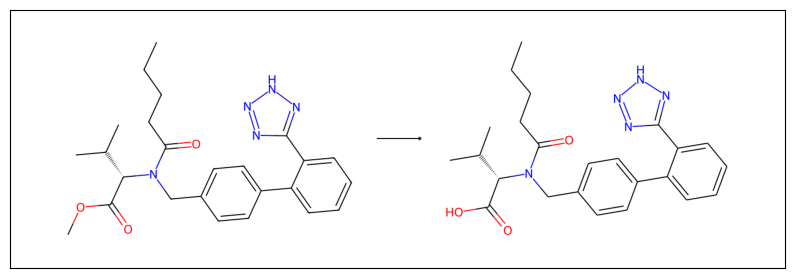

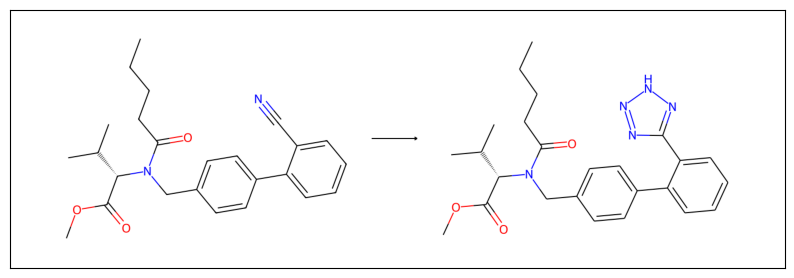

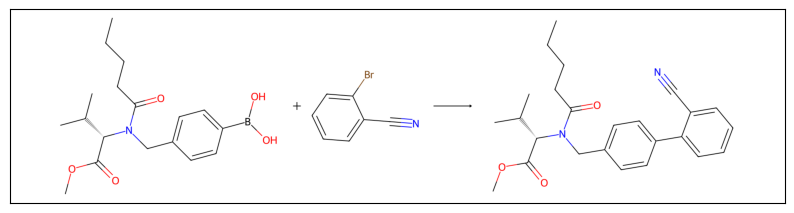

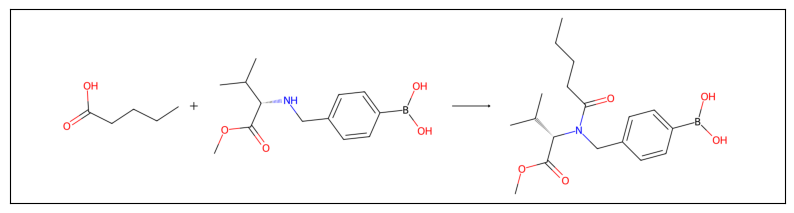

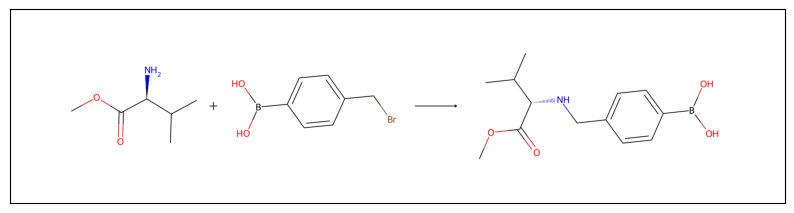

~~~Route number:9~~~


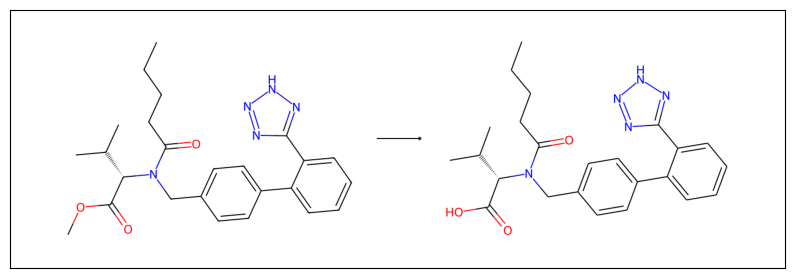

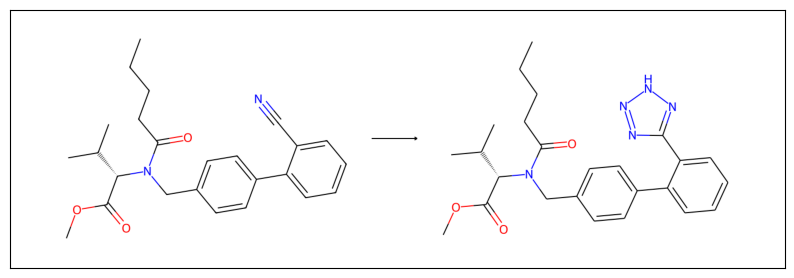

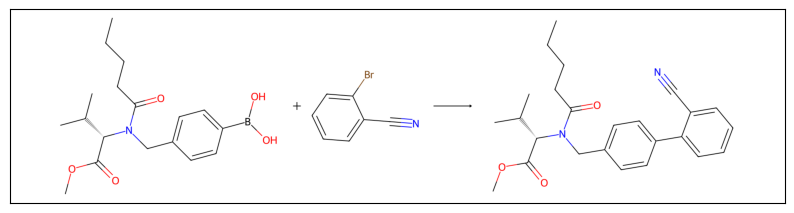

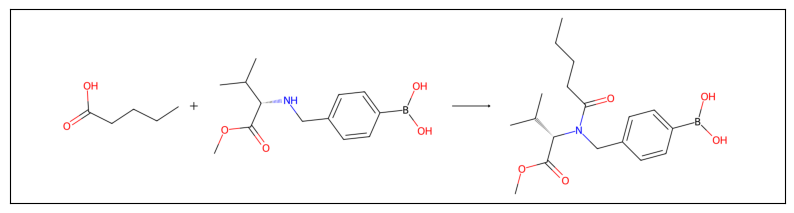

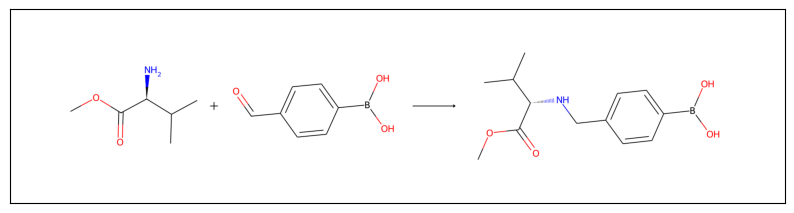

In [1]:
## Visualize the returned routes
from easie.utils.askcos_utils import *
from rdkit.Chem import Descriptors
valsartan_smiles = 'CCCCC(=O)N(CC1=CC=C(C=C1)C2=CC=CC=C2C3=NNN=N3)[C@@H](C(C)C)C(=O)O'
tp_key = "[{'template_set': 'reaxys'}]"
valsartan_results = load_results('data/valsartan_routes.json')
valsartan_routes = valsartan_results[valsartan_smiles][tp_key]['output']
for i, route in enumerate(valsartan_routes):
    print ('~~~Route number:{}~~~'.format(i))
    show_reaction_ls(traverse_pathway(route))

In [2]:
# Read summary statistics about the route routes
# num_analogs represents the number of estimated analogs given the filters specified above
import pandas as pd
path_summary_file = 'outputs/test_askcos_CCCCC(=O)N(CC1=CC=C(C=C1)C2=CC=CC=C2C3=NNN=N3)[C@@H](C(C)C)C(=O)O_pathways_summaries.csv'
summaries = pd.read_csv(path_summary_file, sep='\t', index_col=0)
summaries

,template_score,plausibility,scscore,ppg,regioselectivity_concern,path_length,num_analogs
route_id,,,,,,,
0,"[0.25585773859780747, 0.4074403794543448, 0.82...","[0.998350799, 0.973993838, 0.998476386]","[3.751072535299523, 3.2178145400359313, 2.7337...","[8.0, 0.0, 0.0, 1.0, 8.0]",False,3,33
1,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999786, 0.9978629...","[3.751072535299523, 3.2178145400359313, 3.0434...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 3.0, 1.0]",False,5,673
2,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999748647, 0.9999...","[3.751072535299523, 3.2178145400359313, 2.6515...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 6.0]",False,5,815
3,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999748647, 0.9995...","[3.751072535299523, 3.2178145400359313, 2.6515...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 6.0]",False,5,1173
4,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999748647, 0.9940...","[3.751072535299523, 3.2178145400359313, 2.6515...","[8.0, 0.0, 0.0, 0.0, 16.0, 0.0, 2.0, 1.0, 6.0]",False,5,99
5,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999748647, 0.9999...","[3.751072535299523, 3.2178145400359313, 2.6515...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 6.0]",False,5,357
6,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999748647, 0.9995...","[3.751072535299523, 3.2178145400359313, 2.6515...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 6.0]",False,5,518
7,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999786, 0.9978629...","[3.751072535299523, 3.2178145400359313, 3.0434...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0]",False,5,673
8,"[0.25585773859780747, 0.4074403794543448, 0.01...","[0.998350799, 0.973993838, 0.999786, 0.9810221...","[3.751072535299523, 3.2178145400359313, 3.0434...","[8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 3.0, 1.0]",False,5,970


### 2. Enumeration

To perform the explicit enumeration of the compounds, run the following command:
`python enumerate_analogs_askcos_route.py --askcos-output data/valsartan_routes.json --building-blocks easie/building_blocks/buyables.json.gz --out outputs/test_askcos --sim-thresh 0.6 --brenk-filter --nprocs 16`

This will perform the enumeration with a Tanimoto similarity threhshold on the building blocks of 0.6, with the Brenk filters.

For each route, a list of dictionaries is returned. Each dictionary contains the SMILES for the product (`smiles`) as well as the SMILES for each of the associated building blocks

In [3]:
enumeration_results = []
with open('outputs/test_askcos_CCCCC(=O)N(CC1=CC=C(C=C1)C2=CC=CC=C2C3=NNN=N3)[C@@H](C(C)C)C(=O)O_enumeration_results.txt', 'r') as f:
    for l in f.readlines():
        enumeration_results.append(json.loads(l))

We can take a look at the compounds enumerated from the first route

In [4]:
enumerated_smiles = [e['smiles'] for e in enumeration_results[0]]
enumerated_mols = [Chem.MolFromSmiles(s) for s in enumerated_smiles]
print ('{} molecules enumerated from the first route'.format(len(enumerated_smiles)))

39 molecules enumerated from the first route


We can check to see that the same number of molecules fall under the molecular weight cutoff of 600g/mol as we had predicted in the first section

In [5]:
enumerated_mws = [Descriptors.ExactMolWt(m) for m in enumerated_mols]
print ('Number of mols within MW cutoff:')
print (len([mw for mw in enumerated_mws if mw <=600]))

Number of mols within MW cutoff:
33
